In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('data.csv')

# Display the first few rows to understand the structure
print(df.head())

         ID  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    842302    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    842517    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2  84300903    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3  84348301    11.42     20.38       77.58   386.1      0.14250       0.28390   
4  84358402    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  ...  texture3  perimeter3   area3  \
0      0.3001          0.14710     0.2419  ...     17.33      184.60  2019.0   
1      0.0869          0.07017     0.1812  ...     23.41      158.80  1956.0   
2      0.1974          0.12790     0.2069  ...     25.53      152.50  1709.0   
3      0.2414          0.10520     0.2597  ...     26.50       98.87   567.7   
4      0.1980          0.10430     0.1809  ...     16.67      152.20  1575.0   

   smoothness3  compactness3  co

In [5]:
print(df.columns)

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


In [6]:
# If the correct column name is 'Diagnosis' instead of 'diagnosis'
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Then separate features and target variable using the correct column name
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [10]:
feature_importances = rf_model.feature_importances_

# Create a pandas Series to hold the feature names and their importance scores
importances = pd.Series(feature_importances, index=X.columns)

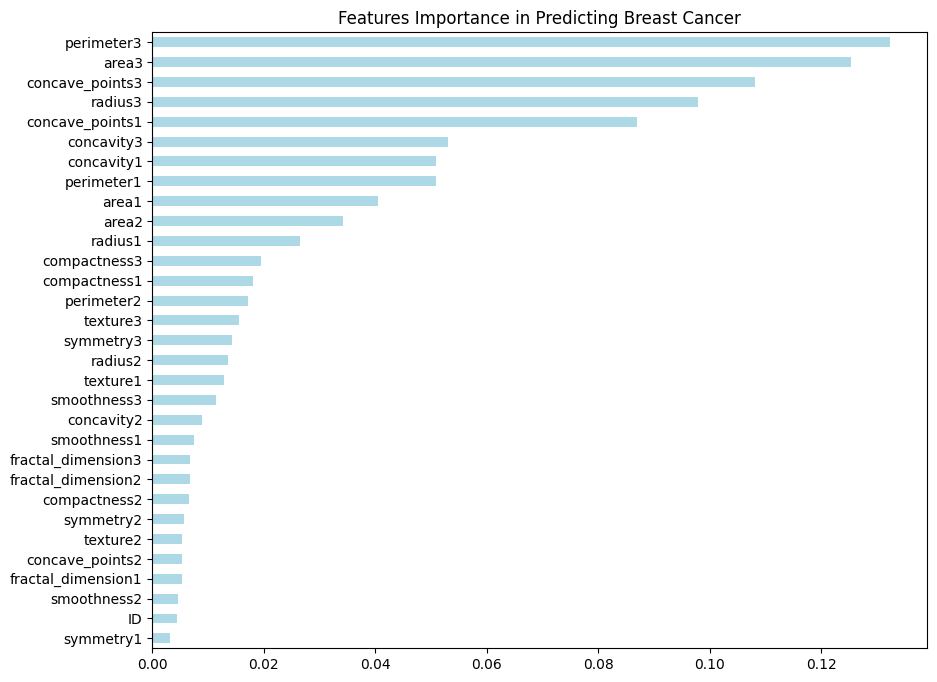

In [11]:
# Sort the feature importances in descending order for better visualization
importances_sorted = importances.sort_values()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Features Importance in Predicting Breast Cancer')
plt.show()